### Загрузка и подготовка данных к анализу

Маркетинг приложения Procrastinate Pro+
   
Цель: выяснить причины, почему развлекательное приложение Procrastinate Pro+ терпит убытки несмотря на хорошее вложение в рекламу. Для этого нам дали 3 таблицы. Таблица визиты хранит информацию откуда пришел к нам клиент, сколько времени провел у нас на сайте, с какого устройства он это сделал и из какого региона. 
    
Таблица ордерс хранит информацию о сумме покупки, времени и дате покупки и об ид клиента. 
Таблица кастс хранит информацию о времени сумме и канале, кому совершается оплата за рекламу.

Этапы:

Вначале проанализируем данные, пригодны ли они для анализа. Рассмотрим наличие пропусков, дубликатов. Также обратим внимание на типы данных. 

Затем добавим функции, которые понадобятся для создания профилей пользователей, удержания, конверсии, LTV, ROI.

Проверим маркетинг: выявим лидеров по покупки рекламы. Посмотрим сас, построим распределение по месяцам. 

На последнем шаге построим Ltv, Roi, удержание, конверсию по каналам привлечения, устройствам странам. 

In [1]:
import pandas as pd
from datetime import datetime, timedelta

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
visits.rename(columns=str.lower, inplace=True)
visits.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
visits.head(5)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [6]:
visits.isnull().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [7]:
visits.duplicated().sum()

0

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])

In [9]:
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [11]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [12]:
orders.rename(columns=str.lower, inplace=True)
orders.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
orders.head(5)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [13]:
orders.isnull().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [14]:
orders.duplicated().sum()

0

In [15]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [17]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [18]:
costs.rename(columns=str.lower, inplace=True)
costs.head(5)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [19]:
costs.isnull().sum()

dt         0
channel    0
costs      0
dtype: int64

In [20]:
costs.duplicated().sum()

0

In [21]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


In [22]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропуски и дубликаты в таблицах отсутствуют. Поменяли типы данных у столбцов с датой и временем c object на datetime.
  
Обнаружили в названиях заглавные буквы и пробелы. Для удобства и соблюдения стиля мы их сделали все строчными и вместо пробела поставили нижнее подчеркивание. 
    
Таблица визиты хранит информацию откуда пришел к нам клиент, сколько времени провел у нас на сайте, с какого устройства он это сделал и из какого региона. 
    
Таблица ордерс хранит информацию о сумме покупки, времени и дате покупки и об ид клиента. 
    
Таблица кастс хранит информацию о времени, сумме и канале, кому совершается оплата за рекламу. 

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Напишим функции для дальнейшего изучения данных. 

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [23]:
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [24]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [25]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [26]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [27]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#window = 7
#filter_data(report, window).plot(grid = True)
#plt.title('Ширина окна сглаживания: {}'.format(window))
#plt.xlabel('Дата привлечения')
#plt.show() 

In [28]:
def plot_retention(retention, retention_history, horizon, window):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [29]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()



In [30]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()



### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [31]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Найдем период, за который у нас предоставлены данные, на основе которых, мы будем делать анализ и давать советы для исправления ситуации.

In [32]:
min_analysis_date = profiles['first_ts'].min()
min_analysis_date

Timestamp('2019-05-01 00:00:41')

In [33]:
observation_date = profiles['first_ts'].max()
observation_date

Timestamp('2019-10-27 23:59:04')

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

In [34]:
profiles.groupby('region').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending = False)

,user_id
region,
United States,100002
UK,17575
France,17450
Germany,14981


In [35]:
region = profiles.loc[profiles['payer'] == True]
region.groupby('region').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending = False)

,user_id
region,
United States,6902
UK,700
France,663
Germany,616


In [36]:
profiles.groupby('region').agg({'payer': 'mean'}).sort_values(by='payer', ascending=False)

,payer
region,
United States,0.069019
Germany,0.041119
UK,0.039829
France,0.037994


Мы видим, что регион с самым большим привлечением сша. Он в несколько раз по привлечению больше остальных. Тут следует сказать, что это может зависеть от населения страны. Но соотношение платящих и не платящих клиентов снова на первое место выводит США, правда не со столь значительным отрывом. По количеству платящих клиентов в разы больше. 

In [37]:
profiles.groupby('device').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending = False)

,user_id
device,
iPhone,54479
Android,35032
PC,30455
Mac,30042


In [38]:
region.groupby('device').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending = False)

,user_id
device,
iPhone,3382
Android,2050
Mac,1912
PC,1537


In [39]:
profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


По девайсам по количеству лидируют пользователи айфонов. Затем идут пользователи с андройдом. Покупки совершаются преимущественно на маке и айфонах. 

In [40]:
profiles.groupby('channel').agg({'payer': 'mean', 'user_id': 'nunique'}).sort_values(by='payer', ascending=False)

,payer,user_id
channel,,
FaceBoom,0.122049,29144
AdNonSense,0.113402,3880
lambdaMediaAds,0.104700,2149
TipTop,0.096007,19561
RocketSuperAds,0.079137,4448
WahooNetBanner,0.052964,8553
YRabbit,0.038265,4312
MediaTornado,0.035747,4364
LeapBob,0.030633,8553


In [41]:
region.groupby('channel').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending = False)

,user_id
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


Фейсбум имеет наиболее привлекательные параметры. Там самая большая доля платящих клиентов из привлеченных. Он же занимает первое место по оплатам. Затем идет сервис тип топ, затем клинты, которые пришли сами. Остальные, настолько мелкие, что рассматривать их отдельно не имеет смысла. 

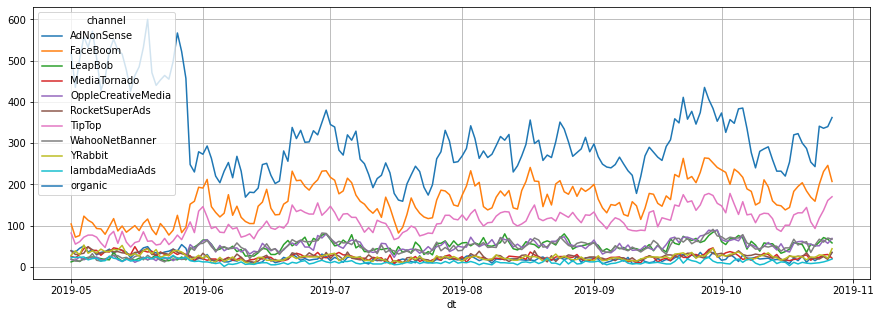

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построем график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [43]:
all_costs = costs['costs'].sum()
all_costs

105497.30000000002

Мы узнали сумму общих затрат на рекламу.

In [44]:
channel = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
channel['per'] = ((channel['costs'] / all_costs) * 100).round(2)
channel

,costs,per
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


Мы видим лидеров по затратам. Это типтоп и фейсбум. Суммарно эти площадки занимают 82 процента от всех трат. Видим, что два канала съели более 80% бюджета.

In [45]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week

In [46]:
costs['month'] = costs['dt'].dt.month

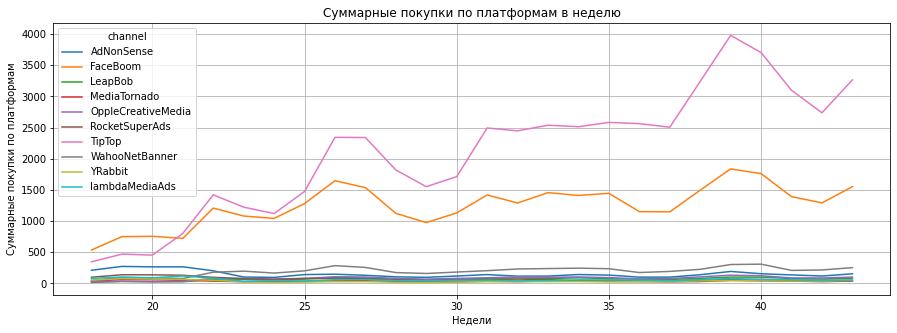

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

costs.pivot_table(
    index='week',  # даты первых посещений
    columns='channel',  # источники переходов
    values='costs',  # ID пользователей
    aggfunc='sum'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)
plt.xlabel('Недели');
plt.ylabel('Суммарные покупки по платформам');
plt.title('Суммарные покупки по платформам в неделю');
plt.show()

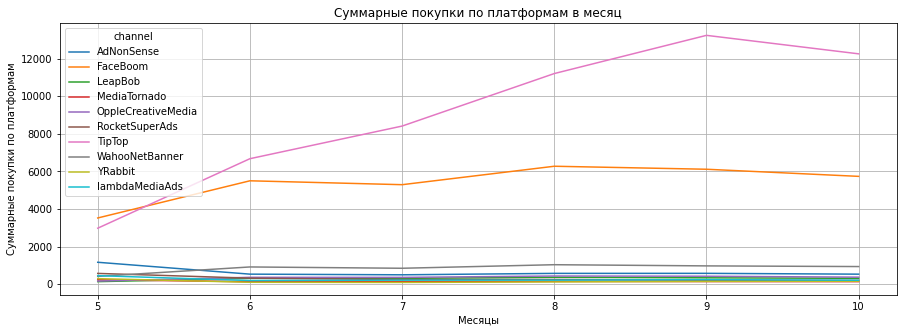

In [48]:
costs.pivot_table(
    index='month',  # даты первых посещений
    columns='channel',  # источники переходов
    values='costs',  # ID пользователей
    aggfunc='sum'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)
plt.xlabel('Месяцы');
plt.ylabel('Суммарные покупки по платформам');
plt.title('Суммарные покупки по платформам в месяц');
plt.show()

 Видим динамику расходов. TipTop и FaceBoom заметно выделяются. Мы видим, что на рекламу на тип топ начали тратить больше денег. В то время как траты на фейс бум тоже в начале периода были увеличены незначительно и линия трат выглядит довольно стабильно. 

In [49]:
profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Мы видим, что стоимость одного клиента довольно высокая у тип топа и фейсбума. Даже можно сказать, что она очень дорогая. Остальные варьируются в диапазоне 5-30 условных денежных единиц. 

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. 

In [50]:
horizon_days = 14

In [51]:
profiles = profiles.loc[profiles['channel'] != 'organic']

In [52]:
get_ltv

<function __main__.get_ltv(profiles, purchases, observation_date, horizon_days, dimensions=[], ignore_horizon=False)>

In [53]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles,  
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False)

In [54]:
horizon = 14

In [55]:
window = 14

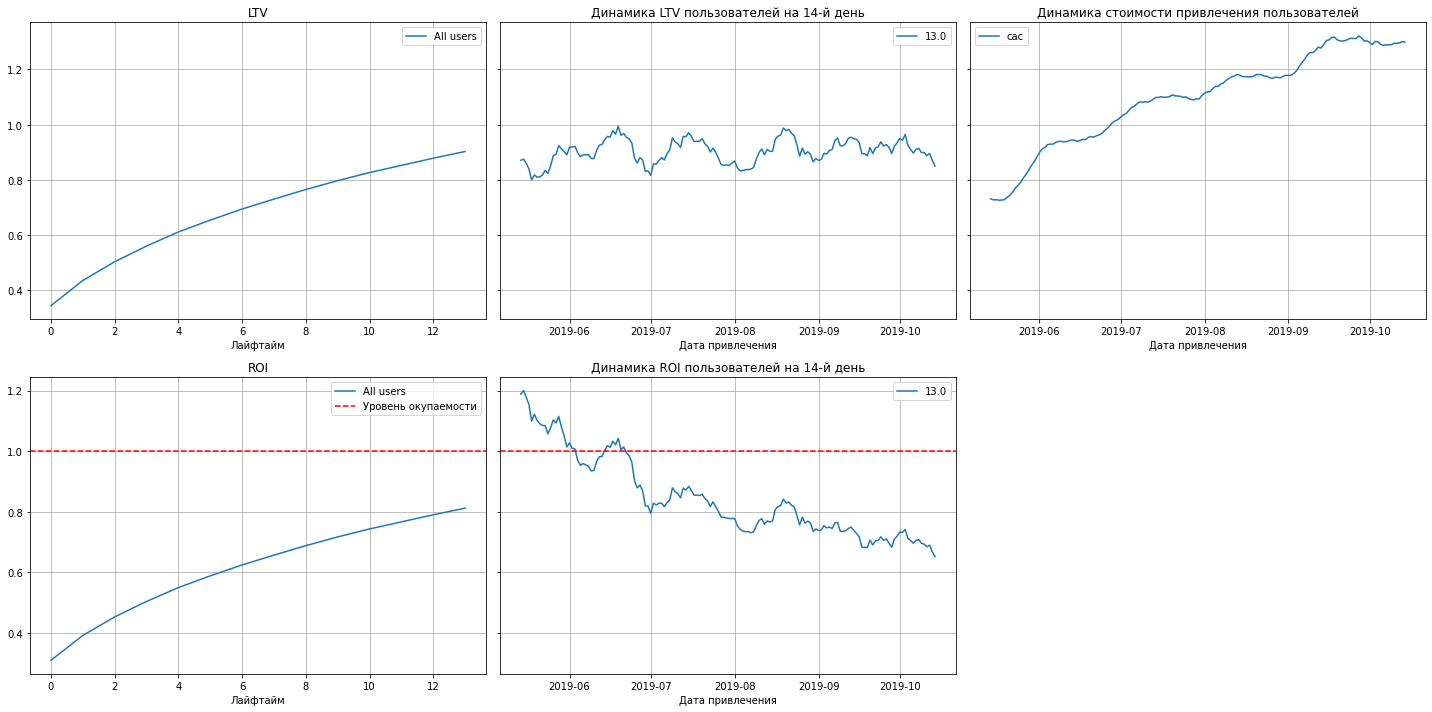

In [56]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window)

По общей данным без разбития на когорты, мы видим, что ценность клиента не претерпела значительных изменений, она довольно стабильна. 

Общая динамика стоимости привлечения пользователей несоразмерно выросла за период с мая по ноябрь. 

Общая динамика окупаемости инвестиций в рекламу на 14 день заметно снижается и пересекла линию окупаемости во второй половине лета. То есть окупаемости суммарно за период анализа нет. 

In [57]:
get_conversion


<function __main__.get_conversion(profiles, purchases, observation_date, horizon_days, dimensions=[], ignore_horizon=False)>

In [58]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, 
    orders, 
    observation_date, 
    horizon_days, 
    ignore_horizon=True)

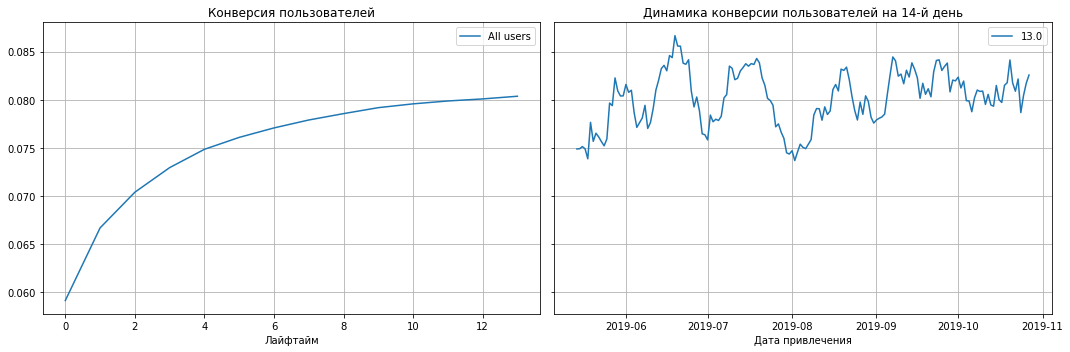

In [59]:
plot_conversion(conversion, conversion_history, horizon, window=14)

Конверсия довольно стабильная. В начале периода она хорошо выросла и стабилизировалась чуть ниже пика. 

In [60]:
get_retention

<function __main__.get_retention(profiles, sessions, observation_date, horizon_days, dimensions=[], ignore_horizon=False)>

In [61]:
retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, horizon_days, ignore_horizon=False)

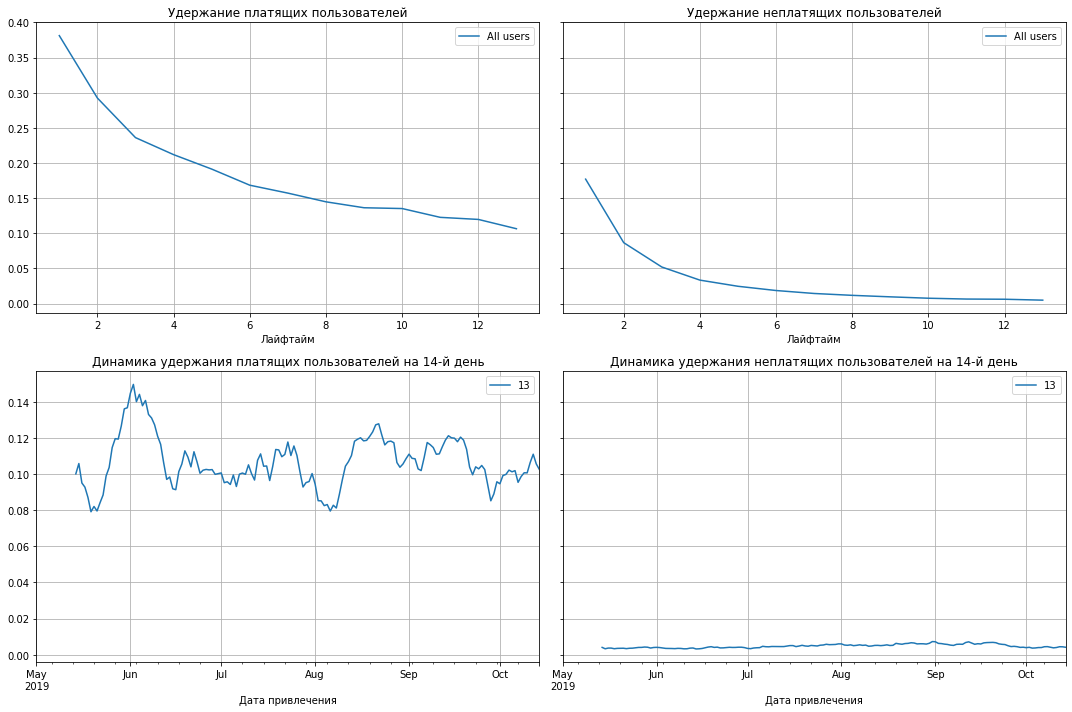

In [62]:
plot_retention(retention, retention_history, horizon, window)

Удержание пользователей нормальное. Удержание на 14 день платящих пользователей чуть снизилось в среднем. Удержание не платящих пользователей стабильно и в августе - сентябре чуть выросло. 

Можно констатировать, что вложения в рекламу перестала окупаться. Клиентов, которые приходят сами мы не учитываем. Так как на них не тратиться рекламный бюджет. 

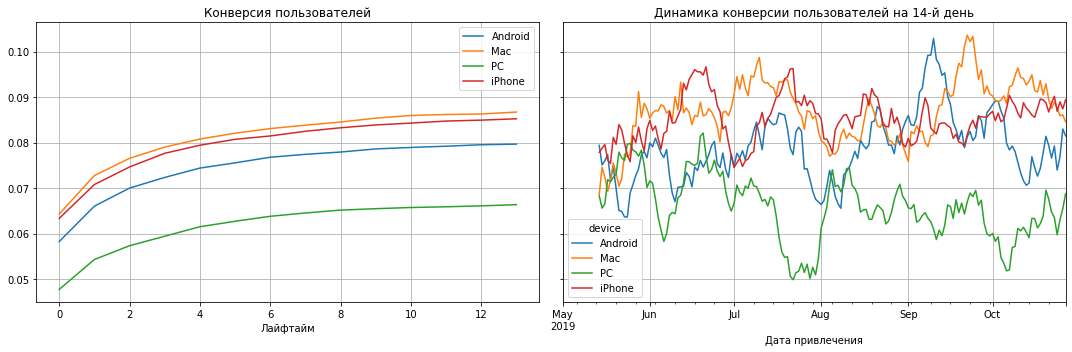

In [63]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, 
    orders, 
    observation_date, 
    horizon_days, 
    dimensions=['device'], 
    ignore_horizon=True)
plot_conversion(conversion, conversion_history, horizon, window=14)

Конверсия пользователей приближается к 0.09 на маках и айфонах. На уровне 0.08 андройд. Значительно ниже пк. Аналогичную ситуацию мы видим и в исследуемый период. В конце сильно упал пк, также был пик и падение у андройда и айфона. Мак стабилен.

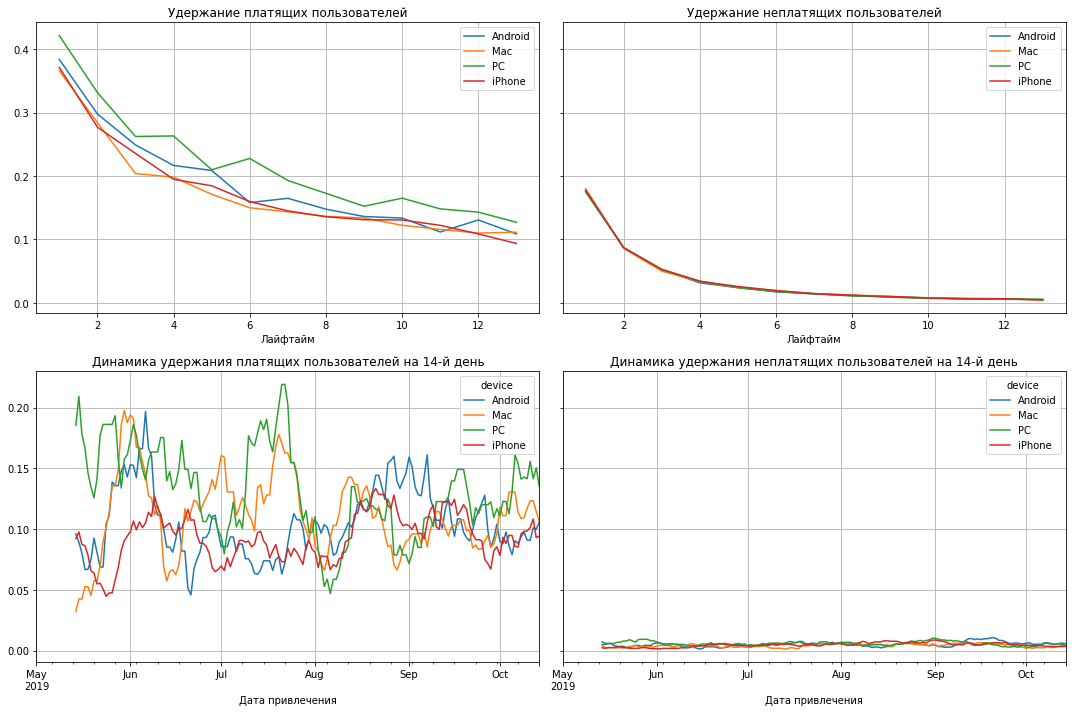

In [64]:
retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['device'], ignore_horizon=False)
plot_retention(retention, retention_history, horizon, window)

С удержанием не платящих пользователей все хорошо. С платящими пользователями также различия не значительные. Но можно заметить что по дням удержание лучше у пк и андройда, но не значительно. 

In [65]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles,  
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,)

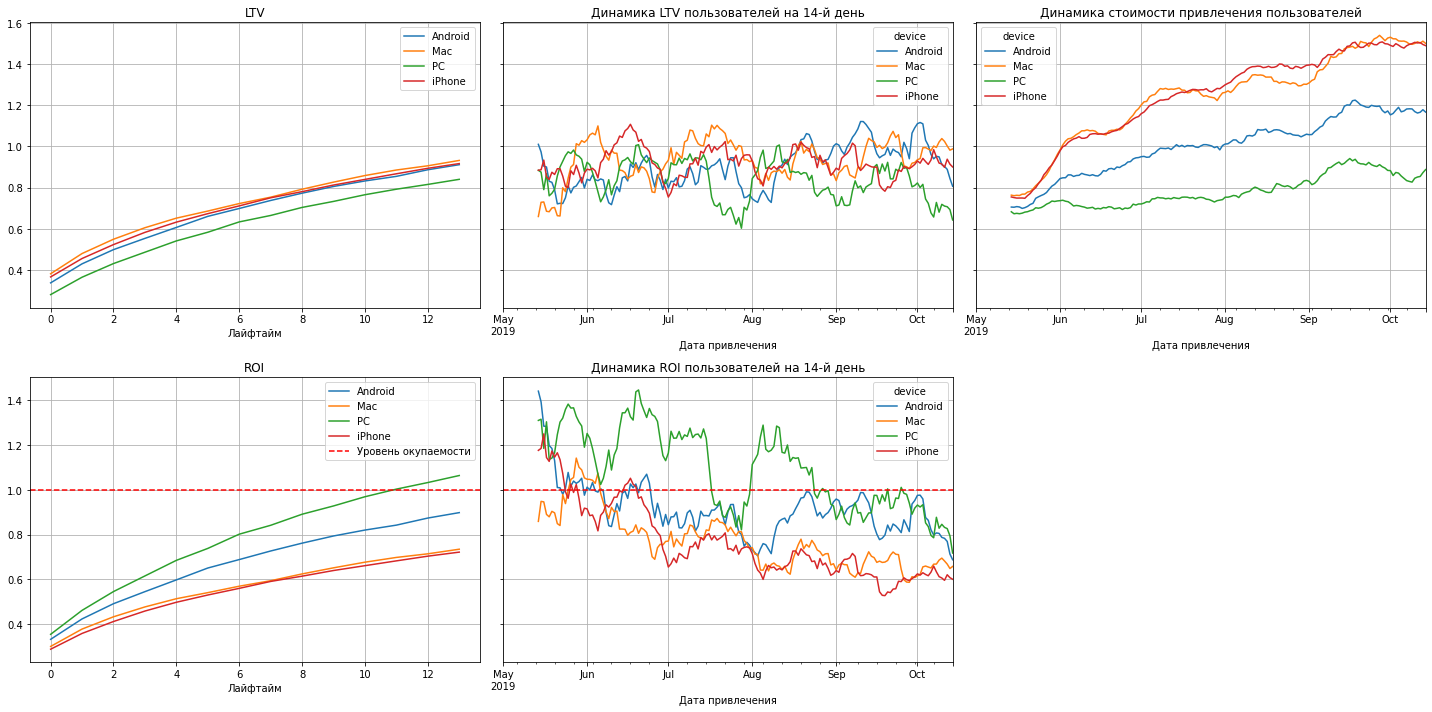

In [66]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window)

Ценность клиента по устройствам довольно стабильна. В начале был рост. Мы это видели на общем графике. Различия между устройствами в среднем не значительны. 

Динамика стоимости привлечения пользователей несоразмерно выросла за период с мая по ноябрь. Мак и айфон занимают лидирующие позиции. В разы выше чем пк. Посередине андройд. 

А динамика окупаемости показывает нам картину, что за исследуемый период андройд и пс находятся в зоне окупаемости, а айфоны и мак не окупаются. По динамики окупаемость на 14 день видим нисходящую динамику. Мак и андройд уже в июле упали ниже окупаемости. Андройд тоже упал, значительно, но находился большее время в зоне окупаемости. За 14 дней окупается только PC.

In [67]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles,  
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,)

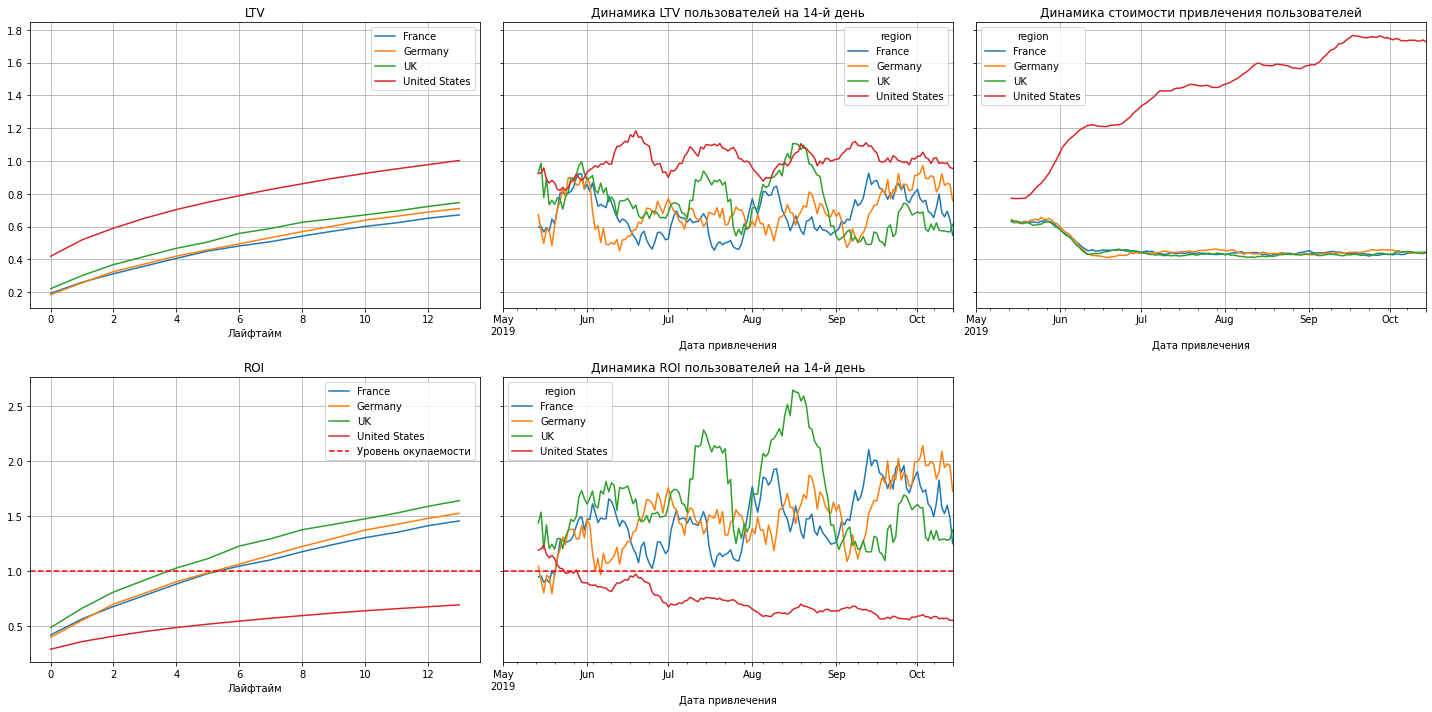

In [68]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window)

Ценность клиентов стабильна, но у клиентов из сша ценность больше чем у остальных.

Как мы помним, что количество клиентов в США в разы превышают количество в остальных странах.

Динамика сас в разы в сша больше, чем в других странах, более того они расходятся в разные стороны. США начала расти еще в мае. Соответственно окупаемость инвестиций нет. Пересечение зоны окупаемости в сша происходит в июне. Остальные страны идут довольно стабильно, только в октябре можно зафиксировать падение Франции, Англии. Германия наоборот начинает расти.

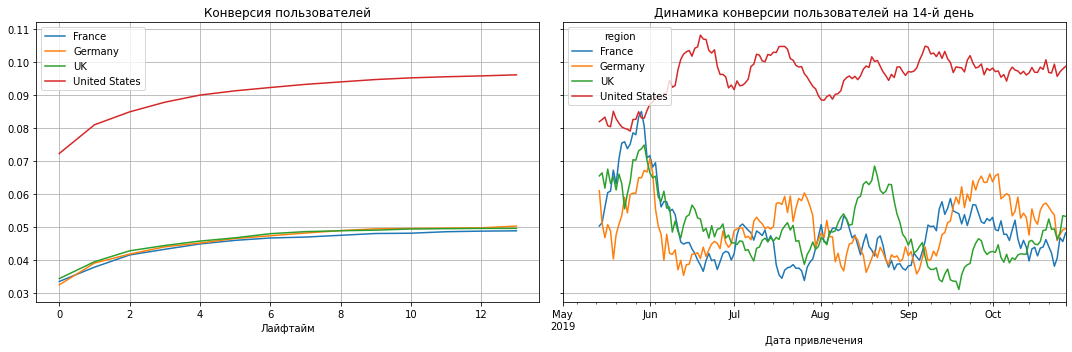

In [69]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, 
    orders, 
    observation_date, 
    horizon_days, 
    dimensions=['region'], 
    ignore_horizon=True)
plot_conversion(conversion, conversion_history, horizon, window=14)

Конверсия в сша намного больше, чем в других странах. Причем в начале периода, Франция была довольно близко. А потом пошло снижение. Скорее всего повлияло уменьшение рекламы в других странах, кроме сша. 

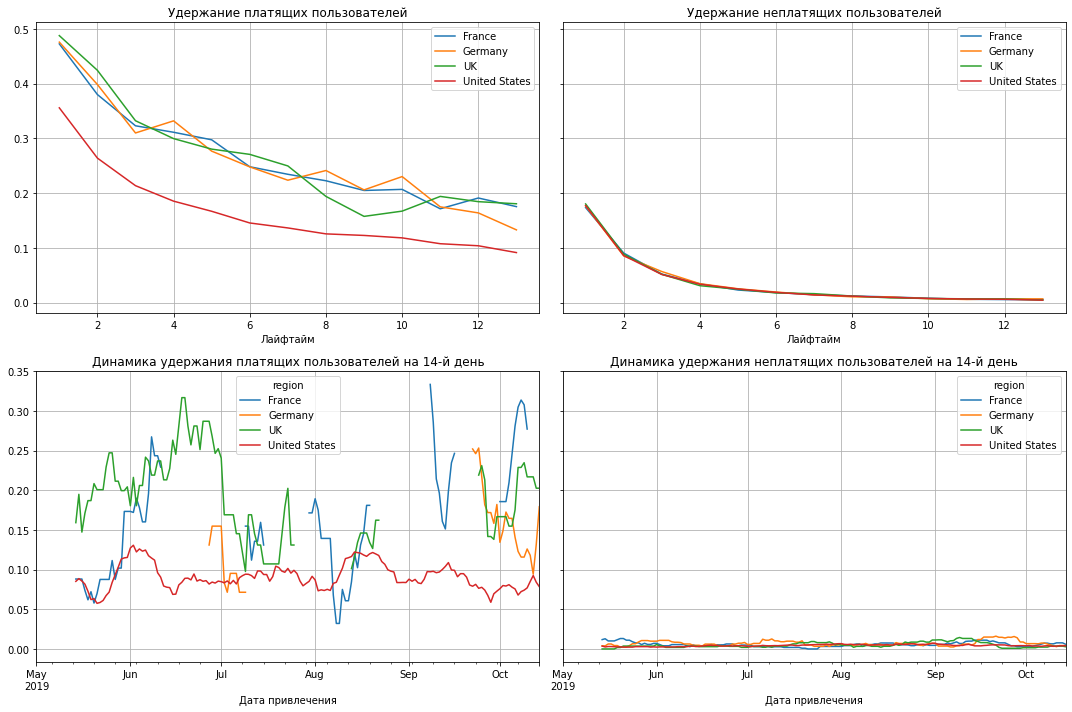

In [70]:
retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['region'], ignore_horizon=False)
plot_retention(retention, retention_history, horizon, window)

Удержание пользователей в сша ниже, чем во всех остальных странах в день. Если посмотреть по месяцам, то ниже всех в среднем сша, довольно стабильно. Линии других стран прерываются, потому что пользователей совсем немного и иногда они не приходят. 

In [71]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles,  
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,)

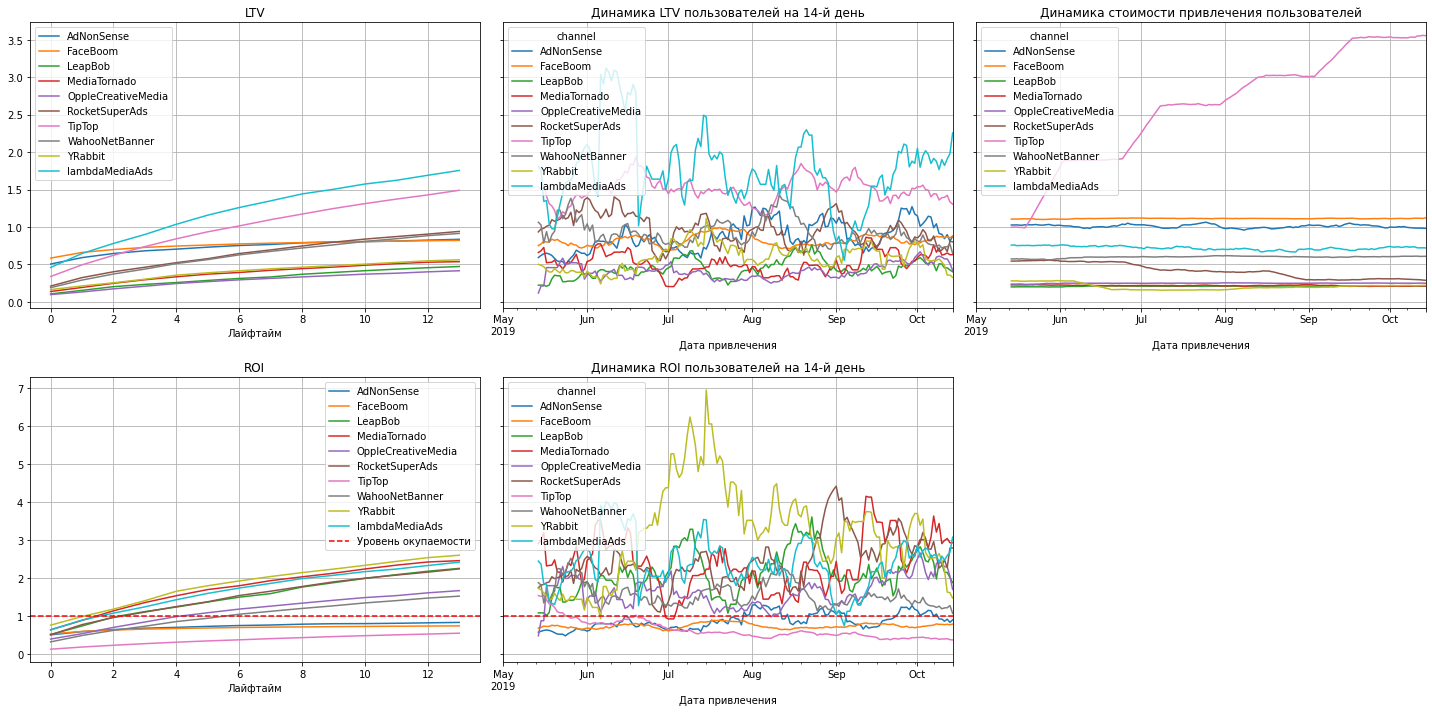

In [72]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window)

Мы помним, что значительное число клиентов приходит при помощи рекламы на Фейсбум, типтоп. 

Ценность клиентов привлеченных на фейсбуме на начало периода была самой высокой, но затем практически не поднялась. На тип топе хороший рост в течение 14 дней. Лидером является лямбдамедиаадс в течение 14 дней на протяжении исследуемого периода. 

Динамика стоимости привлечения стабильны. Только тип топ очень сильно увеличивали финансирование. Также хочу обратить внимание на рокетсуперадс финансирование уменьшилось, а ценность клиентов даже выросла к концу периода. 

Ниже зоны окупаемости находятся фейсбум типтоп и аднонсенс. Можно сделать вывод, что клиенты там очень дорогие, несмотря на количество клиентов, которые приходят. 

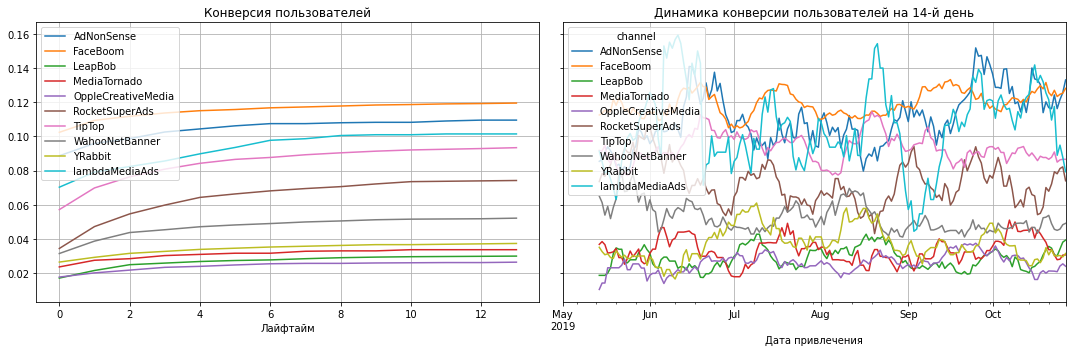

In [73]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, 
    orders, 
    observation_date, 
    horizon_days, 
    dimensions=['channel'], 
    ignore_horizon=True)
plot_conversion(conversion, conversion_history, horizon, window=14)

По конверсии хорошо идут фейсбум, аднонсенс, лямбдамедиаадс, тип топ. Конверсия за этот период только подтверждает недельный вывод. 

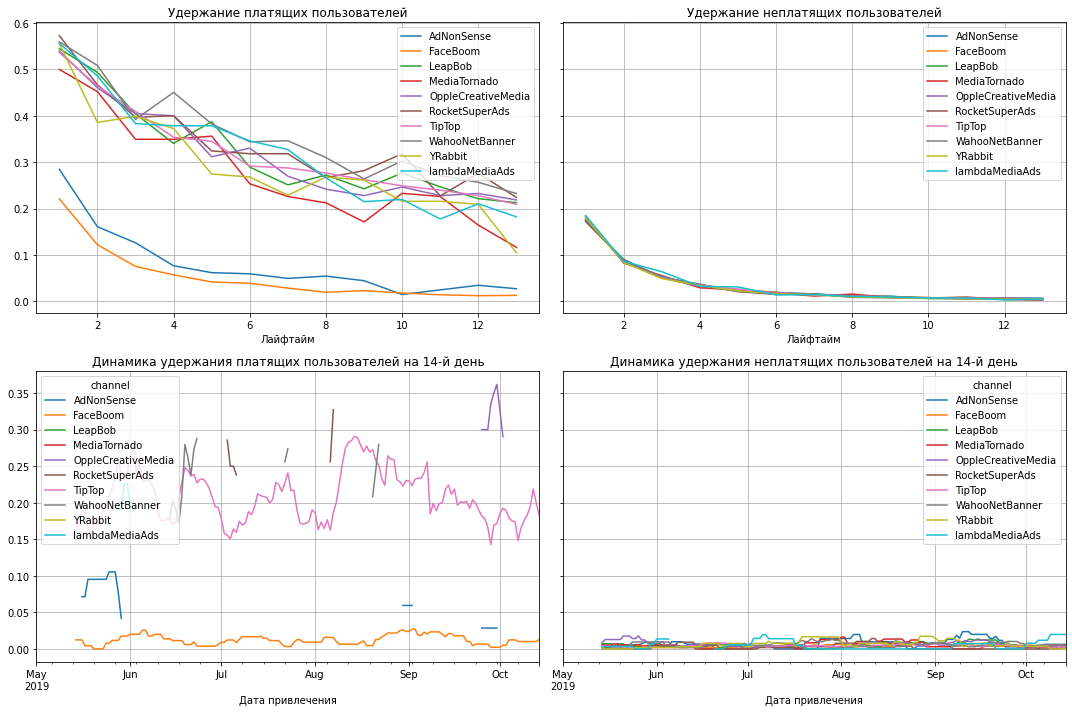

In [74]:
retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['channel'], ignore_horizon=False)
plot_retention(retention, retention_history, horizon, window)

In [75]:
profiles.groupby('region').agg({'channel': 'unique'})

,channel
region,
France,"[AdNonSense, WahooNetBanner, OppleCreativeMedi..."
Germany,"[AdNonSense, LeapBob, WahooNetBanner, OppleCre..."
UK,"[WahooNetBanner, LeapBob, lambdaMediaAds, Oppl..."
United States,"[FaceBoom, YRabbit, MediaTornado, RocketSuperA..."


Самое плохое удержание в фейсбум и аднонсенс. На общем графике динамики за изучаемый период для многих не достаточно данных, чтобы проследить динамику. Скорее всего это из-за недофинансирования. Ниже всех располагается фейсбум. Тип топ находится на уровне с остальными, но есть другие, которые находятся выше, но проанализировать их динамику полностью не получится. Видим причину не окупаемости каналов FaceBoom и AdNonSense.

# Вывод

Стоимость уникального клиента сильно выросла, а динамика окупаемости резко упала, и, на данный момент, окупаемости нет. В то же время, общая конверсия, ценность и удержание клиентов в норме. Убытки в рекламе возникли из-за неэффективного привлечения клиентов состоит из нескольких факторов. 

Стоимость одного клиента сша обходится очень дорого, по сравнению с остальными странами. Окупаемости инвестиций в сша нет и она значительно в минусе. Удержание пользователей сша стабильно, но значительно ниже, чем в остальных странах.

У площадок-лидеров, по которым привлекается большинство пользователей с помощью рекламы (тип топ, фейсбум), нет окупаемости. Они находятся значительно ниже порога окупаемости, а также ниже остальных площадок. Стоимость одного клиента на тип топе в разы превышает стоимость уникальных клиентов на других площадках. Следом идет Фейсбум, сас которого не сильно отличается от других. Удержание клиента у тип топа вторая по ценности, а вот у фейсбума она довольно низкая, что является одной из причин не окупаемости. Также у фейсбума самая высокое удержание клиентов. А у тип топа средняя конверсия и хорошее удержание наравне с другими платформами. 

Можно сделать вывод, что у фейсбума плохие показатели пользователей и довольно хорошее финансирование. У тип топа хорошие пользовательские показатели, но реклама там избыточно финансируется. 

На ситуацию с устройствами не стоит обращать большое внимание, так как больших аномалий там нет, деление по устройствам отражает общую картину, но подчеркивает региональную специфику. Понятно, что пользователей мак и айфонов большее число жителей сша. Поэтому эти данные проседают по окупаемости. Выглядят завышенными по сас. То есть по устройствам каких-либо аномалий не обнаружено. 

Рекомендации:

Несмотря на то, что в сша наблюдаются ситуация избыточного финансирования рекламы, отказываться от этого рынка не стоит. Конверсия и ценность пользователей в разы выше у всех остальных стран. Кроме того, не стоит забывать, что на эту страну приходиться львиная доля пользователей. Надо уменьшить вливания в тип топ и делать больше закупок рекламы на других платформах, которые показывают хорошую динамику (например, рокетсуперадс). Также советую присмотреться к платформам, которые работают в других странах (германии, франции), например, лямбдамедиаадс, рокетсуперадс.